In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.model_selection import train_test_split

In [22]:
training_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

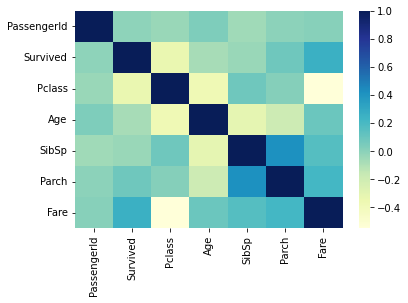

In [23]:
sns.heatmap(training_data.corr() , cmap='YlGnBu' )
plt.show()

In [24]:
training_data.head()
training_data = training_data.drop(columns="Cabin" , axis=1)



In [25]:
training_data.shape

(891, 11)

In [26]:
training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [27]:
test_data = test_data.drop(columns="Cabin" , axis=1)

In [28]:
training_data.loc[(training_data.Age.isnull())&(training_data['Survived']==0), 'Age']=training_data.loc[(training_data.Age.notnull())&(training_data['Survived']==0), 'Age'].median()


In [29]:
training_data.loc[(training_data.Age.isnull())&(training_data['Survived']==1), 'Age']=training_data.loc[(training_data.Age.notnull())&(training_data['Survived']==1), 'Age'].median()


In [30]:
print(training_data.Age.isnull().sum())

0


In [31]:
training_data['Embarked'].fillna(training_data['Embarked'].mode()[0] , inplace=True)

In [32]:
training_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [33]:
training_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)


In [34]:
X = training_data.drop(columns=['PassengerId' , 'Name' , 'Ticket' , 'Survived'] , axis=1)

In [35]:
Y = training_data['Survived']

In [36]:
X['age_age'] = X.Age **2


In [37]:
X["Pclass_Fare"] = X.Pclass * X.Fare

In [38]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,age_age,Pclass_Fare
0,3,0,22.0,1,0,7.2500,0,484.0,21.7500
1,1,1,38.0,1,0,71.2833,1,1444.0,71.2833
2,3,1,26.0,0,0,7.9250,0,676.0,23.7750
3,1,1,35.0,1,0,53.1000,0,1225.0,53.1000
4,3,0,35.0,0,0,8.0500,0,1225.0,24.1500


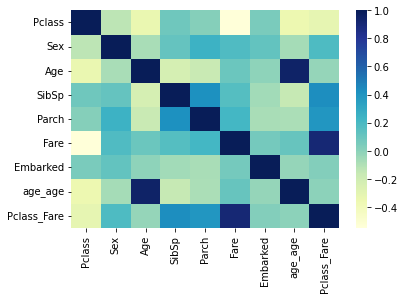

In [39]:
sns.heatmap(X.corr() , cmap='YlGnBu' )
plt.show()

In [40]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,age_age,Pclass_Fare
0,3,0,22.0,1,0,7.2500,0,484.0,21.7500
1,1,1,38.0,1,0,71.2833,1,1444.0,71.2833
2,3,1,26.0,0,0,7.9250,0,676.0,23.7750
3,1,1,35.0,1,0,53.1000,0,1225.0,53.1000
4,3,0,35.0,0,0,8.0500,0,1225.0,24.1500


In [41]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y , test_size =0.25 , random_state = 0)

In [42]:
algo1 = LogisticRegression()

In [43]:
X.count()

Pclass         891
Sex            891
Age            891
SibSp          891
Parch          891
Fare           891
Embarked       891
age_age        891
Pclass_Fare    891
dtype: int64

In [44]:
algo1.fit(X_train , Y_train)

c:\Users\abhiv\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
algo1.score(X_train , Y_train)



0.8038922155688623

In [46]:
algo1.score(X_test , Y_test)

0.7802690582959642

In [47]:
X_train.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,age_age,Pclass_Fare
105,3,0,28.0,0,0,7.8958,0,784.0,23.6874
68,3,1,17.0,4,2,7.9250,0,289.0,23.7750
253,3,0,30.0,1,0,16.1000,0,900.0,48.3000
320,3,0,22.0,0,0,7.2500,0,484.0,21.7500
706,2,1,45.0,0,0,13.5000,0,2025.0,27.0000


In [48]:
algo1.predict(X_test)

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1], dtype=int64)

In [49]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,age_age,Pclass_Fare
495,3,0,28.0,0,0,14.4583,1,784.0,43.3749
648,3,0,28.0,0,0,7.5500,0,784.0,22.6500
278,3,0,7.0,4,1,29.1250,2,49.0,87.3750
31,1,1,28.0,1,0,146.5208,1,784.0,146.5208
255,3,1,29.0,0,2,15.2458,1,841.0,45.7374


In [50]:
test_data.drop(columns=['PassengerId' , 'Name' , 'Ticket'] , axis=1 , inplace=True)


In [51]:
test_data.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [52]:
test_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)


In [53]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,0
4,3,1,22.0,1,1,12.2875,0


In [54]:
test_data["Fare"].fillna(test_data['Embarked'].mode()[0] , inplace=True)


In [55]:
test_data["Age"].fillna(test_data["Age"].median() , inplace=True)

In [56]:
test_data["age_age"] = test_data.Age**2
test_data["Pclass_Fare"] = test_data.Pclass * test_data.Fare

In [57]:
test_data["Age_Fare"] = test_data.Age * test_data.Fare


In [61]:
test_data.drop(columns="Age_Fare" , axis=1 , inplace=True)

In [62]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,age_age,Pclass_Fare
0,3,0,34.5,0,0,7.8292,2,1190.25,23.4876
1,3,1,47.0,1,0,7.0000,0,2209.00,21.0000
2,2,0,62.0,0,0,9.6875,2,3844.00,19.3750
3,3,0,27.0,0,0,8.6625,0,729.00,25.9875
4,3,1,22.0,1,1,12.2875,0,484.00,36.8625


In [63]:
sub = pd.read_csv("gender_submission.csv")
sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [64]:
pred = algo1.predict(test_data)


In [65]:
print(pred)


[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [66]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [67]:
sub['Survived'] = pred.astype('int')


In [68]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int32
dtypes: int32(1), int64(1)
memory usage: 5.0 KB


In [69]:
sub.to_csv('Submission.csv' , index = False)